In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf  # Import TensorFlow

# Import necessary components from tf.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
#import tensorflow as tf

# Import necessary components from tf.keras
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import ModelCheckpoint


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/Indian-monuments/images/train"
validation_data_path = "/content/drive/MyDrive/Colab Notebooks/Indian-monuments/images/test"

DATA PRE PROCESSING

In [ ]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

In [ ]:
training_data =  training_datagen.flow_from_directory(train_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='categorical') # Change class_mode to 'categorical'

Found 3666 images belonging to 24 classes.


In [ ]:
training_data.class_indices

{'Ajanta Caves': 0,
 'Charar-E- Sharif': 1,
 'Chhota_Imambara': 2,
 'Ellora Caves': 3,
 'Fatehpur Sikri': 4,
 'Gateway of India': 5,
 'Humayun_s Tomb': 6,
 'India gate pics': 7,
 'Khajuraho': 8,
 'Sun Temple Konark': 9,
 'alai_darwaza': 10,
 'alai_minar': 11,
 'basilica_of_bom_jesus': 12,
 'charminar': 13,
 'golden temple': 14,
 'hawa mahal pics': 15,
 'iron_pillar': 16,
 'jamali_kamali_tomb': 17,
 'lotus_temple': 18,
 'mysore_palace': 19,
 'qutub_minar': 20,
 'tajmahal': 21,
 'tanjavur temple': 22,
 'victoria memorial': 23}

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:

valid_data =  valid_datagen.flow_from_directory(validation_data_path,
                                      target_size=(150, 150),
                                      batch_size=32,
                                      class_mode='categorical')


Found 1049 images belonging to 24 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

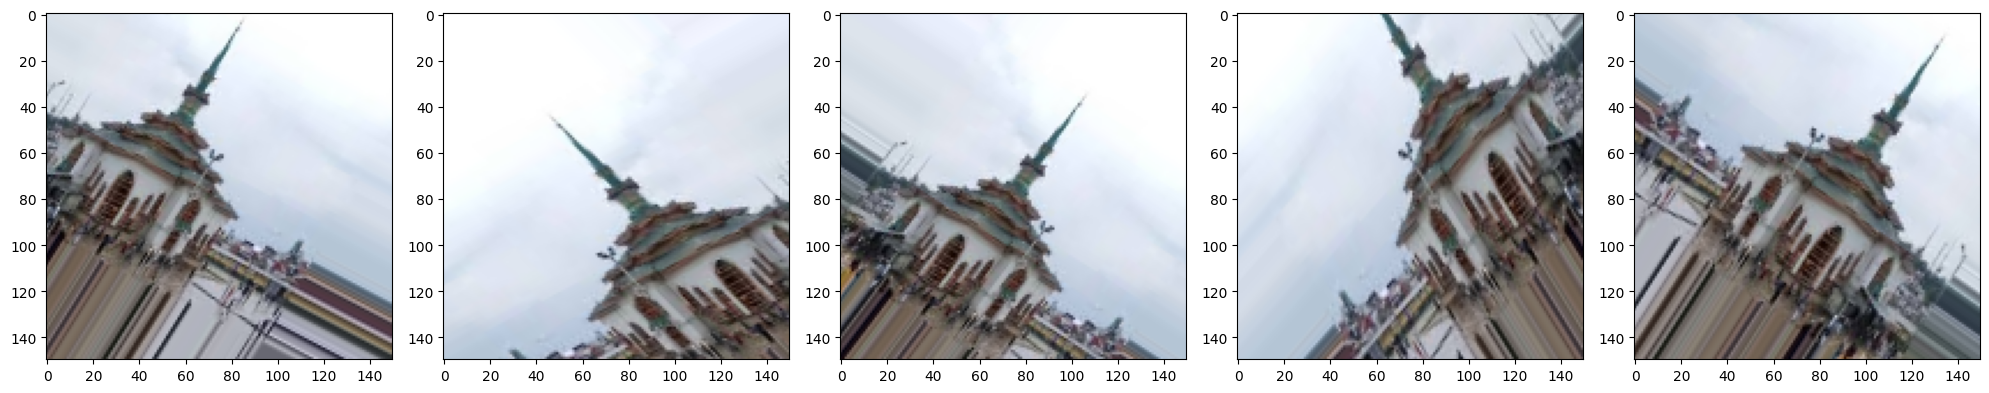

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

building CNN model


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from tensorflow import keras
from tensorflow.keras.regularizers import l2

# Construct the CNN model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=7, kernel_regularizer=l2(0.01),
                        input_shape=(150, 150, 3)),  # Specify input shape here
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=5),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=128, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=256, kernel_size=3),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=24, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn_model.compile(optimizer = Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_path = '/content/drive/MyDrive/Colab Notebooks/monument_predictor.keras'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:



































































































































































# train cnn model
history = cnn_model.fit(training_data,
                          epochs=50,
                          verbose=1,
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.1934 - loss: 3.2094
Epoch 1: val_accuracy improved from 0.16873 to 0.18112, saving model to /content/drive/MyDrive/Colab Notebooks/monument_predictor.keras
115/115 ━━━━━━━━━━━━━━━━━━━━ 73s 598ms/step - accuracy: 0.1935 - loss: 3.2094 - val_accuracy: 0.1811 - val_loss: 3.3297
Epoch 2/50
114/115 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.1776 - loss: 3.1831
Epoch 2: val_accuracy did not improve from 0.18112
115/115 ━━━━━━━━━━━━━━━━━━━━ 81s 595ms/step - accuracy: 0.1777 - loss: 3.1831 - val_accuracy: 0.1449 - val_loss: 3.8298
Epoch 3/50
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.2093 - loss: 3.1974
Epoch 3: val_accuracy did not improve from 0.18112
115/115 ━━━━━━━━━━━━━━━━━━━━ 72s 594ms/step - accuracy: 0.2092 - loss: 3.1971 - val_accuracy: 0.1697 - val_loss: 3.2736
Epoch 4/50
114/115 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.1964 - loss: 3.1790
Epoch 4: val_accuracy improved from 0.18112 to 0.1

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

IMPORT LIBRARIES


In [ ]:
import numpy as np
import tensorflow as tf

# Instead of:
# from keras.preprocessing.image import ImageDataGenerator

# Use:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# or
# from tensorflow.keras.utils import image_dataset_from_directory
# and apply transformations with tf.data

import model


In [ ]:
import tensorflow as tf
from tensorflow import keras

model_path = '/content/drive/MyDrive/Copy of monument_predictor.keras'
model1 = keras.models.load_model(model_path)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


pre processing

In [ ]:
h1='/content/drive/MyDrive/Colab Notebooks/WhatsApp Image 2024-11-23 at 20.03.14_7d7d82d3.jpg'
h2='/content/drive/MyDrive/Colab Notebooks/1.jpg'

In [ ]:
import numpy as np
from keras.preprocessing import image

# Class mapping dictionary
class_map = {
    0: 'Ajanta Caves',
    1: 'Charar-E- Sharif',
    2: 'Chhota_Imambara',
    3: 'Ellora Caves',
    4: 'Fatehpur Sikri',
    5: 'Gateway of India',
    6: 'Humayun_s Tomb',
    7: 'India gate pics',
    8: 'Khajuraho',
    9: 'Sun Temple Konark',
    10: 'alai_darwaza',
    11: 'alai_minar',
    12: 'basilica_of_bom_jesus',
    13: 'charminar',
    14: 'golden temple',
    15: 'hawa mahal pics',
    16: 'iron_pillar',
    17: 'jamali_kamali_tomb',
    18: 'lotus_temple',
    19: 'mysore_palace',
    20: 'qutub_minar',
    21: 'tajmahal',
    22: 'tanjavur temple',
    23: 'victoria memorial'
}

# Function to predict the monument
def pred_monument(model, image_path):
    # Load and preprocess the image
    test_image = image.load_img(image_path, target_size=(150, 150))
    test_image = image.img_to_array(test_image) / 255.0  # Normalize to [0, 1]
    test_image = np.expand_dims(test_image, axis=0)  # Add batch dimension

    # Predict the class probabilities
    result = model.predict(test_image).round(3)

    # Get the class index with the highest probability
    pred = np.argmax(result)

    # Retrieve the class name using the mapping
    predicted_class = class_map[pred]

    # Display the prediction results
    print(f"Prediction probabilities: {result}")
    print(f"Predicted class index: {pred}")
    print(f"Predicted class name: {predicted_class}")


In [ ]:
test_image_path = '/content/drive/MyDrive/download (4).jpeg'


# Call the prediction function
pred_monument(model1, test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction probabilities: [[0.    0.034 0.017 0.001 0.008 0.186 0.002 0.072 0.001 0.    0.001 0.
  0.004 0.018 0.606 0.004 0.002 0.    0.006 0.014 0.002 0.01  0.004 0.007]]
Predicted class index: 14
Predicted class name: golden temple
